# -*- coding: utf-8 -*-
## Created on Wed Oct 23 21:23:43 2019

## @author: sscodes(SANKET SARKAR)



# Import Libraries:



In [24]:
import numpy as np
import pandas as pd

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data:

In [26]:
df = pd.read_csv('Classified Data', index_col=0)

In [27]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


# Standardising the data into a common scale:

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
scaler_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [32]:
scaler_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [34]:
df_feat = pd.DataFrame(scaler_features,columns=df.columns[:-1])

In [35]:
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# KNN:

## Spliting data:

In [36]:
X=df_feat
y=df['TARGET CLASS']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Applying KNN:

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=1)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

## Predictions:

In [42]:
predictions=knn.predict(X_test)

## Evaluations:

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, predictions)

array([[151,   8],
       [ 15, 126]], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy=accuracy_score(y_test, predictions)*100

In [47]:
accuracy

92.33333333333333

### For K other than 1:

In [52]:
error_rate = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions_i=knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

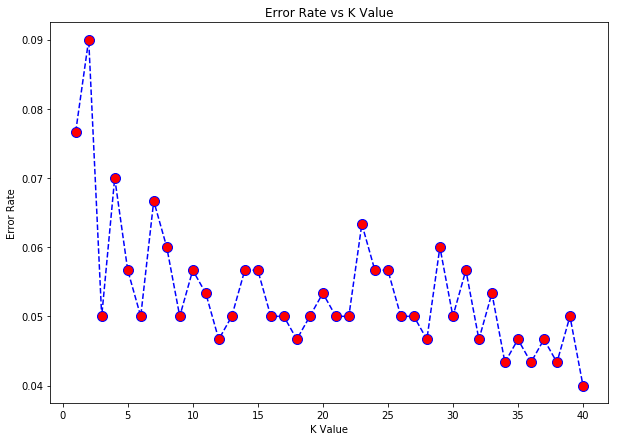

In [53]:
plt.figure(figsize=(10,7))
plt.plot(range(1,41),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize='10')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

In [54]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train,y_train)
predictions_40=knn.predict(X_test)
error_rate.append(np.mean(predictions_40 != y_test))

In [56]:
confusion_matrix(y_test, predictions_40)

array([[154,   5],
       [  7, 134]], dtype=int64)

In [59]:
accuracy=accuracy_score(y_test, predictions_40)*100

In [60]:
accuracy

96.0